# Tutorial 4, Question 2

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

## Set learning parameters

In [2]:
lr = 0.1
num_epochs = 500

## Read the training data

In [3]:
X = torch.tensor(np.array([[1.0, 1.0], [0.0, 1.0], [3.0, 4.0], [2.0, 2.0], [2.0, -2.0], [-2.0, -3.0]]))
Y = torch.tensor(np.array([0, 0, 1, 1, 2, 2]))
K = torch.tensor(np.array([[1, 0, 0],
              [1, 0, 0],
              [0, 1, 0],
              [0, 1, 0],
              [0, 0, 1],
              [0, 0, 1]]).astype(float))

## initialize weights and biases

In [4]:
W_init = [[-0.10, 0.97, 0.18], 
          [-0.70, 0.38, 0.93]]
b_init = [0.0, 0.0, 0.0]
V_init = [[1.01, 0.09, -0.39],
          [0.79, -0.45, -0.22],
          [0.28, 0.96, -0.07]]
c_init = [0.0, 0.0, 0.0]

## Design a class for the two-layer DNN

In [5]:
class Two_Layer_DNN_Classifier():
  def __init__(self):
    self.V = torch.tensor(V_init, dtype=torch.double)
    self.c = torch.tensor(c_init, dtype=torch.double)
    self.W = torch.tensor(W_init, dtype=torch.double)
    self.b = torch.tensor(b_init, dtype=torch.double)

  def __call__(self, x):
    z = torch.matmul(x, self.W) + self.b
    h = torch.sigmoid(z)
    u = torch.matmul(h, self.V) + self.c
    p = torch.exp(u)/torch.sum(torch.exp(u), axis=1, keepdims=True)
    y = torch.argmax(p, axis=1)
    return z, h, u, p, y

In [6]:
def loss(k, y, p):
    entropy = -torch.sum(torch.log(p)*k)
    error = torch.sum(torch.not_equal(torch.argmax(k, dim=1), y))
    return entropy, error

In [7]:
def train(model, inputs, k, learning_rate):
    z, h, u, p, y = model(inputs)
    grad_u = -(k - p)
    grad_V = torch.matmul(torch.transpose(h, 0, 1), grad_u)
    grad_c = torch.sum(grad_u, axis=0)

    dh = h*(1-h)
    grad_z = torch.matmul(grad_u, torch.transpose(model.V, 0, 1))*dh
    grad_W = torch.matmul(torch.transpose(inputs, 0, 1), grad_z)
    grad_b = torch.sum(grad_z, axis=0)

    model.W -= learning_rate*grad_W
    model.b -= learning_rate*grad_b
    model.V -= learning_rate*grad_V
    model.c -= learning_rate*grad_c
    
    return grad_u, dh, grad_z

In [8]:
model = Two_Layer_DNN_Classifier()

print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

W = [[-0.1   0.97  0.18]
 [-0.7   0.38  0.93]], b = [0. 0. 0.]
V = [[ 1.01  0.09 -0.39]
 [ 0.79 -0.45 -0.22]
 [ 0.28  0.96 -0.07]], c = [0. 0. 0.]


## Train

In [9]:
entropy, err = [], []
for epoch in range(num_epochs):
    
    z_, h_, u_, p_, y_ = model(X)
    entropy_, err_ = loss(K, y_, p_)
    grad_u_, dh_, grad_z_ = train(model, X, K, lr)
    
    if epoch == 0:
        print('epoch: {}'.format(epoch+1))
        print('z: {}'.format(z_))
        print('h: {}'.format(h_))
        print('u: {}'.format(u_))
        print('f(u): {}'.format(p_))
        print('y: {}'.format(y_))
        print('entropy: {}'.format(entropy_))
        print('error: {}'.format(err_))
        print('grad_u: {}'.format(grad_u_))
        print('dh: {}'.format(dh_))
        print('grad_z:{}'.format(grad_z_))
        print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
        print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))
    
    entropy.append(entropy_)
    err.append(err_)
    
    if not epoch%100:
        print('epoch:%d, error:%g, entropy:%g'%(epoch, err[epoch], entropy[epoch]))

epoch: 1
z: tensor([[-0.8000,  1.3500,  1.1100],
        [-0.7000,  0.3800,  0.9300],
        [-3.1000,  4.4300,  4.2600],
        [-1.6000,  2.7000,  2.2200],
        [ 1.2000,  1.1800, -1.5000],
        [ 2.3000, -3.0800, -3.1500]], dtype=torch.float64)
h: tensor([[0.3100, 0.7941, 0.7521],
        [0.3318, 0.5939, 0.7171],
        [0.0431, 0.9882, 0.9861],
        [0.1680, 0.9370, 0.9020],
        [0.7685, 0.7649, 0.1824],
        [0.9089, 0.0439, 0.0411]], dtype=torch.float64)
u: tensor([[ 1.1511,  0.3926, -0.3483],
        [ 1.0051,  0.4510, -0.3103],
        [ 1.1003,  0.5058, -0.3032],
        [ 1.1625,  0.4594, -0.3348],
        [ 1.4316, -0.0999, -0.4808],
        [ 0.9642,  0.1015, -0.3670]], dtype=torch.float64)
f(u): tensor([[0.5911, 0.2769, 0.1320],
        [0.5426, 0.3118, 0.1456],
        [0.5563, 0.3070, 0.1367],
        [0.5818, 0.2880, 0.1302],
        [0.7332, 0.1585, 0.1083],
        [0.5931, 0.2503, 0.1567]], dtype=torch.float64)
y: tensor([0, 0, 0, 0, 0, 0])
entrop

In [10]:
print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

print('outputs: {}'.format(y_))
print('entropy: %g'%entropy[-1])
print('error: %g'%err[-1])

W = [[-1.80267137  0.31596718  0.09123146]
 [-1.40090016  2.927402    1.9063486 ]], b = [ 4.35090221  0.73119259 -1.72284193]
V = [[ 2.91890488 -5.32695673  3.11805185]
 [ 2.81049361  1.19218685 -3.88268046]
 [ 0.07463652  4.55452175 -3.45915827]], c = [-1.93824763 -0.06070438  1.998952  ]
outputs: tensor([0, 0, 1, 1, 2, 2])
entropy: 0.138053
error: 0


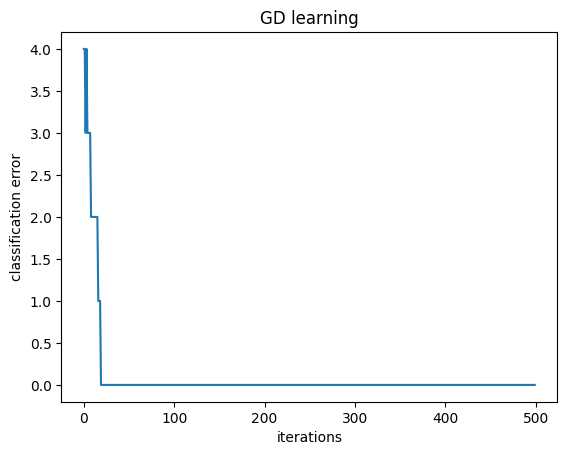

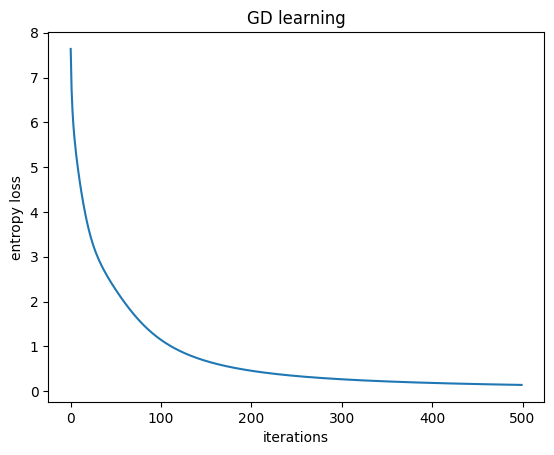

In [11]:
# plot learning curves
plt.figure(1)
plt.plot(range(num_epochs), err)
plt.xlabel('iterations')
plt.ylabel('classification error')
plt.title('GD learning')

plt.figure(2)
plt.plot(range(num_epochs), entropy)
plt.xlabel('iterations')
plt.ylabel('entropy loss')
plt.title('GD learning')

In [13]:
# test inputs
XX = torch.tensor(np.array([[2.5, 1.5],
      [-1.5, 0.5]]))

z_, h_, u_, p_, y_ = model(XX)

print('z: {}'.format(z_))
print('h: {}'.format(h_))
print('u: {}'.format(u_))
print('f(u): {}'.format(p_))
print('y: {}'.format(y_))

z: tensor([[-2.2571,  5.9122,  1.3648],
        [ 6.3545,  1.7209, -0.9065]], dtype=torch.float64)
h: tensor([[0.0947, 0.9973, 0.7965],
        [0.9983, 0.8483, 0.2877]], dtype=torch.float64)
u: tensor([[ 1.2006,  4.2514, -4.3332],
        [ 3.3811, -3.0567,  0.8229]], dtype=torch.float64)
f(u): tensor([[4.5175e-02, 9.5465e-01, 1.7848e-04],
        [9.2675e-01, 1.4827e-03, 7.1771e-02]], dtype=torch.float64)
y: tensor([1, 0])
